<a href="https://colab.research.google.com/github/naufalnashif/data-engineer-test-case/blob/main/DE_cybertrend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dependencies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataMart

In [2]:
dataMart = pd.read_csv("dataMart.csv")
dataMart

,ID,Std-NIS,NIS,school,fullName,email,gender,grade,POB,birth,age,caturWulan,subjects,midTest,finalTest,mean,finalScore
0,1,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Math,95,82,88.5,A
1,2,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Math,66,76,71.0,B
2,3,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,3,Math,59,84,71.5,B
3,4,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Science,71,75,73.0,B
4,5,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Science,77,90,83.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,16196,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,English,56,83,69.5,B
16196,16197,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,3,English,60,62,61.0,C
16197,16198,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,1,Religion,87,76,81.5,B
16198,16199,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,Religion,67,61,64.0,C


In [3]:
dataMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          16200 non-null  int64  
 1   Std-NIS     16200 non-null  object 
 2   NIS         16200 non-null  object 
 3   school      16200 non-null  object 
 4   fullName    16200 non-null  object 
 5   email       16200 non-null  object 
 6   gender      16200 non-null  object 
 7   grade       16200 non-null  int64  
 8   POB         16182 non-null  object 
 9   birth       16200 non-null  object 
 10  age         16200 non-null  int64  
 11  caturWulan  16200 non-null  int64  
 12  subjects    16200 non-null  object 
 13  midTest     16200 non-null  int64  
 14  finalTest   16200 non-null  int64  
 15  mean        16200 non-null  float64
 16  finalScore  16200 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 2.1+ MB


# Analsis Data

## Rata-Rata umur/grade pada setiap sekolah

In [7]:
average_age_table = dataMart.groupby(['school', 'grade'])['age'].mean().reset_index()
average_age_table

,school,grade,age
0,SD Coklat,1,7.72
1,SD Coklat,2,8.60
2,SD Coklat,3,9.66
3,SD Coklat,4,10.56
4,SD Coklat,5,11.58
5,SD Coklat,6,12.64
6,SD Jingga,1,6.32
7,SD Jingga,2,8.12
8,SD Jingga,3,9.28
9,SD Jingga,4,10.16


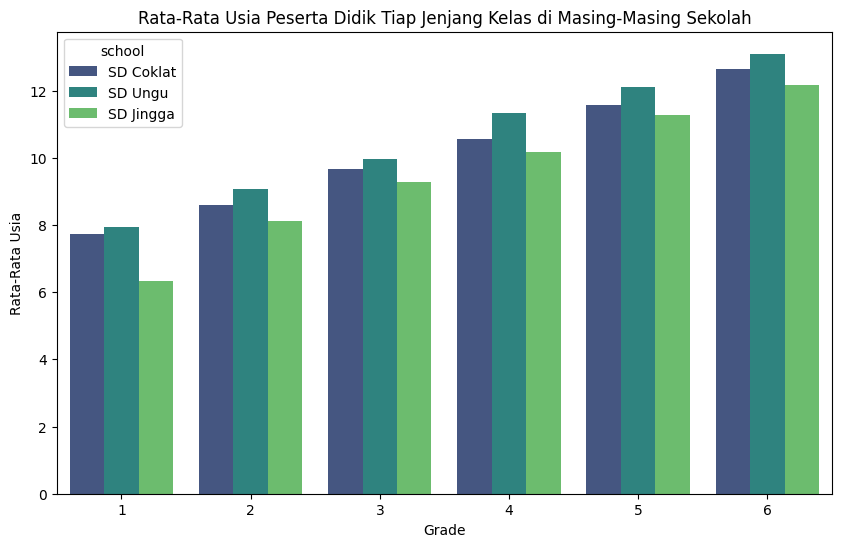

In [9]:
# Urutkan DataFrame berdasarkan grade
sorted_table = average_age_table.sort_values(by='grade')

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='age', hue='school', data=sorted_table, palette='viridis')
plt.title('Rata-Rata Usia Peserta Didik Tiap Jenjang Kelas di Masing-Masing Sekolah')
plt.xlabel('Grade')
plt.ylabel('Rata-Rata Usia')
plt.show()

## Tabel Summary 1

In [13]:
dataMart_summary_1 = dataMart.drop(['midTest', 'finalTest'], axis=1)
dataMart_summary_1

,ID,Std-NIS,NIS,school,fullName,email,gender,grade,POB,birth,age,caturWulan,subjects,mean,finalScore
0,1,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Math,88.5,A
1,2,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Math,71.0,B
2,3,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,3,Math,71.5,B
3,4,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Science,73.0,B
4,5,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Science,83.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,16196,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,English,69.5,B
16196,16197,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,3,English,61.0,C
16197,16198,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,1,Religion,81.5,B
16198,16199,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,Religion,64.0,C


In [17]:
# Memisahkan kolom numerik dan kategorik
numeric_columns = dataMart_summary_1.select_dtypes(include=['number']).columns
categorical_columns = dataMart_summary_1.select_dtypes(include=['object']).columns

# Membuat tabel ringkasan (summary table) untuk kolom numerik
summary_table_numeric = dataMart_summary_1[numeric_columns].describe().transpose()
summary_table_numeric

,count,mean,std,min,25%,50%,75%,max
ID,16200.0,8100.500000,4676.681516,1.0,4050.75,8100.5,12150.25,16200.0
grade,16200.0,3.500000,1.707878,1.0,2.00,3.5,5.00,6.0
age,16200.0,10.091111,2.014049,5.0,9.00,10.0,12.00,15.0
caturWulan,16200.0,2.000000,0.816522,1.0,1.00,2.0,3.00,3.0
mean,16200.0,74.965617,10.407333,50.0,67.50,75.0,82.50,100.0


In [18]:
summary_table_categorical = dataMart_summary_1[categorical_columns].describe(include='all').transpose()
summary_table_categorical

,count,unique,top,freq
Std-NIS,16200,900,Std001-Coklat,18
NIS,16200,300,Std001,54
school,16200,3,SD Coklat,5400
fullName,16200,896,Reni Prita Butarbutar,54
email,16200,758,a.julio@sekolah.edu.id,72
gender,16200,2,M,8640
POB,16182,102,Solok,324
birth,16200,742,2011-12-22,72
subjects,16200,6,Math,2700
finalScore,16200,3,B,8054


## Tabel Summary 2

In [19]:
dataMart_summary_2 = dataMart.drop(['midTest', 'finalTest'], axis=1)
dataMart_summary_2

,ID,Std-NIS,NIS,school,fullName,email,gender,grade,POB,birth,age,caturWulan,subjects,mean,finalScore
0,1,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Math,88.5,A
1,2,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Math,71.0,B
2,3,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,3,Math,71.5,B
3,4,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,1,Science,73.0,B
4,5,Std001-Coklat,Std001,SD Coklat,Ika Tiara Alatas,i.alatas@sekolah.edu.id,F,6,Pariaman,2011-01-05,13,2,Science,83.5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,16196,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,English,69.5,B
16196,16197,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,3,English,61.0,C
16197,16198,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,1,Religion,81.5,B
16198,16199,Std300-Ungu,Std300,SD Ungu,Kemala Agusta Taslim,k.taslim@sekolah.edu.id,F,1,Langsa,2014-07-23,9,2,Religion,64.0,C


### Nilai rata-rata Term Average per mata pelajaran per catur wulan per grade dalam bentuk angka dan huruf

In [26]:
average_mean_table1 = dataMart.groupby(['subjects', 'caturWulan', 'grade'])['mean'].mean().reset_index()
average_mean_table1['mean'] = average_mean_table1['mean'].round(2)

# Tambahkan kolom 'huruf' berdasarkan ketentuan
average_mean_table1['huruf'] = pd.cut(
    average_mean_table1['mean'],
    bins=[0, 49, 69, 84, 100],
    labels=['D', 'C', 'B', 'A'],
    right=True
)

average_mean_table1

,subjects,caturWulan,grade,mean,huruf
0,Bahasa,1,1,76.13,B
1,Bahasa,1,2,74.38,B
2,Bahasa,1,3,74.84,B
3,Bahasa,1,4,74.67,B
4,Bahasa,1,5,74.51,B
...,...,...,...,...,...
103,Social,3,2,75.56,B
104,Social,3,3,75.02,B
105,Social,3,4,74.55,B
106,Social,3,5,74.98,B


### Nilai rata-rata per mata pelajaran per grade dalam bentuk angka dan huruf

In [27]:
average_mean_table2 = dataMart.groupby(['subjects', 'grade'])['mean'].mean().reset_index()
average_mean_table2['mean'] = average_mean_table2['mean'].round(2)

# Tambahkan kolom 'huruf' berdasarkan ketentuan
average_mean_table2['huruf'] = pd.cut(
    average_mean_table2['mean'],
    bins=[0, 49, 69, 84, 100],
    labels=['D', 'C', 'B', 'A'],
    right=True
)

average_mean_table2

,subjects,grade,mean,huruf
0,Bahasa,1,74.61,B
1,Bahasa,2,74.36,B
2,Bahasa,3,74.97,B
3,Bahasa,4,75.23,B
4,Bahasa,5,75.19,B
5,Bahasa,6,75.24,B
6,English,1,74.78,B
7,English,2,74.77,B
8,English,3,74.29,B
9,English,4,74.83,B


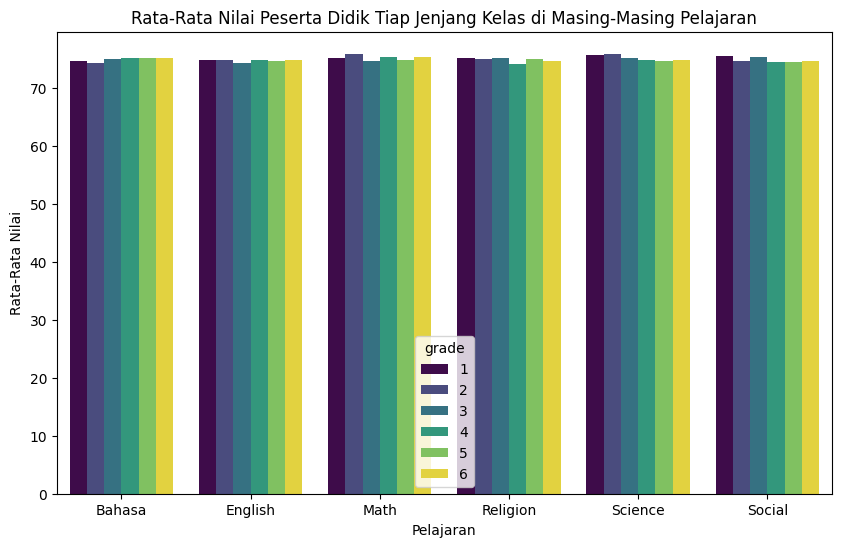

In [65]:


# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='subjects', y='mean', hue='grade', data=average_mean_table2, palette='viridis')
plt.title('Rata-Rata Nilai Peserta Didik Tiap Jenjang Kelas di Masing-Masing Pelajaran')
plt.xlabel('Pelajaran')
plt.ylabel('Rata-Rata Nilai')
plt.show()

### Rata-rata usia per grade per sekolah.

In [28]:
average_age_table = dataMart.groupby(['school', 'grade'])['age'].mean().reset_index()
average_age_table

,school,grade,age
0,SD Coklat,1,7.72
1,SD Coklat,2,8.60
2,SD Coklat,3,9.66
3,SD Coklat,4,10.56
4,SD Coklat,5,11.58
5,SD Coklat,6,12.64
6,SD Jingga,1,6.32
7,SD Jingga,2,8.12
8,SD Jingga,3,9.28
9,SD Jingga,4,10.16


### Jumlah masing-masing gender per grade per sekolah


In [31]:
# Mengambil kolom yang diperlukan
selected_columns = ['Std-NIS', 'school', 'grade', 'gender']
reduced_data = dataMart[selected_columns]

# Menghapus duplikat berdasarkan 'Std-NIS'
unique_data = reduced_data.drop_duplicates(subset=['Std-NIS'])

In [33]:
# Membuat tabel perhitungan jumlah gender per grade per sekolah
sum_gender_table = unique_data.groupby(['school', 'grade','gender']).size().reset_index(name='count')
sum_gender_table

,school,grade,gender,count
0,SD Coklat,1,F,13
1,SD Coklat,1,M,37
2,SD Coklat,2,F,16
3,SD Coklat,2,M,34
4,SD Coklat,3,F,27
5,SD Coklat,3,M,23
6,SD Coklat,4,F,24
7,SD Coklat,4,M,26
8,SD Coklat,5,F,22
9,SD Coklat,5,M,28


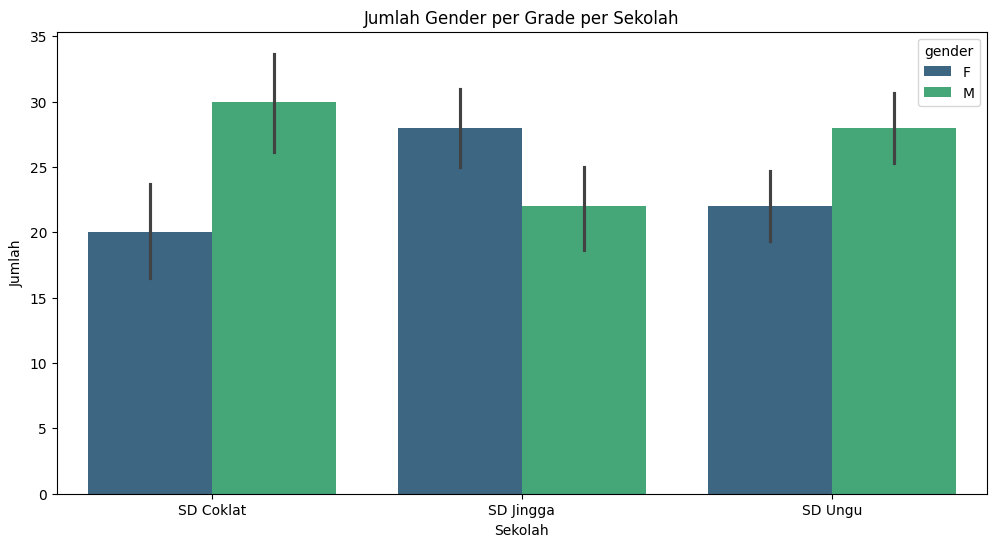

In [54]:
# Visualisasi dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='school', y='count', hue='gender', data=sum_gender_table, palette='viridis')
plt.title('Jumlah Gender per Grade per Sekolah')
plt.xlabel('Sekolah')
plt.ylabel('Jumlah')
plt.show()

## Kesimpulan

### Urutan sekolah dengan nilai rata-rata per mata pelajaran per grade dari yang tertinggi sampai ke terendah.

In [47]:
# Membuat tabel perhitungan rata-rata mean per mata pelajaran per grade per sekolah
average_subjects_table = dataMart.groupby(['subjects', 'grade', 'school'])['mean'].mean().reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata dari yang tertinggi ke terendah
sorted_table = average_subjects_table.sort_values(by=['subjects', 'grade', 'mean'], ascending=[True, True, False])
# sorted_table['mean'] = sorted_table['mean'].round(2)

sorted_table

,subjects,grade,school,mean
2,Bahasa,1,SD Ungu,75.410000
1,Bahasa,1,SD Jingga,74.493333
0,Bahasa,1,SD Coklat,73.913333
5,Bahasa,2,SD Ungu,74.733333
4,Bahasa,2,SD Jingga,74.423333
...,...,...,...,...
104,Social,5,SD Ungu,73.956667
103,Social,5,SD Jingga,73.633333
105,Social,6,SD Coklat,75.866667
106,Social,6,SD Jingga,75.683333


### Urutan sekolah dengan jenjang usia tertua sampai termuda di tiap grade

In [61]:
average_age_table = dataMart.groupby(['grade','school'])['age'].mean().reset_index()
average_age_sort = average_age_table.sort_values(by=['grade', 'age'], ascending=[True, False])
average_age_sort

,grade,school,age
2,1,SD Ungu,7.94
0,1,SD Coklat,7.72
1,1,SD Jingga,6.32
5,2,SD Ungu,9.08
3,2,SD Coklat,8.60
4,2,SD Jingga,8.12
8,3,SD Ungu,9.98
6,3,SD Coklat,9.66
7,3,SD Jingga,9.28
11,4,SD Ungu,11.34


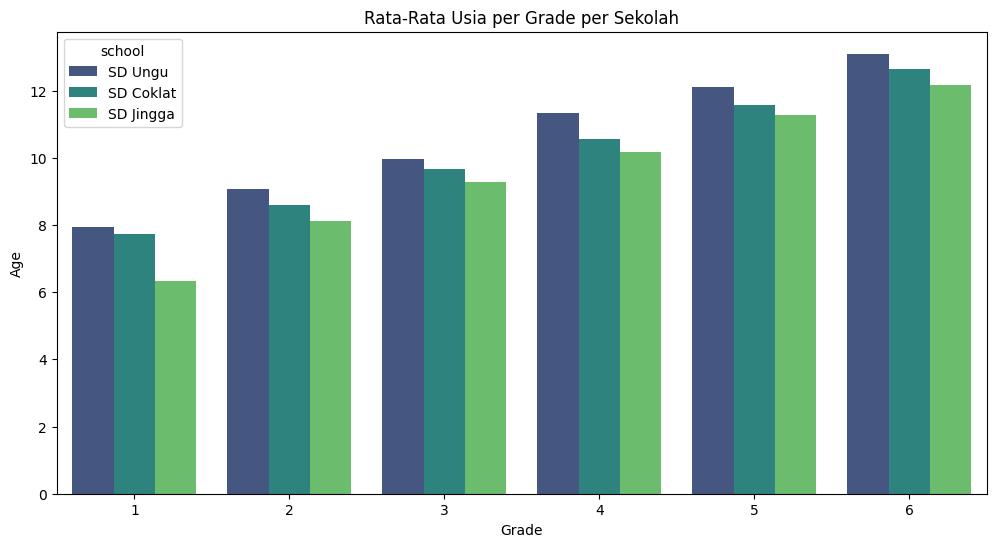

In [62]:
# Visualisasi dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='grade', y='age', hue='school', data=average_age_sort, palette='viridis')
plt.title('Rata-Rata Usia per Grade per Sekolah')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.show()